In [157]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
df_base = pl.read_csv("/home/tat/Research/app/ee_hase/exp_Tdiv/wandb_export_2024-10-31T12_42_21.564+09_00.csv", infer_schema_length=1000)


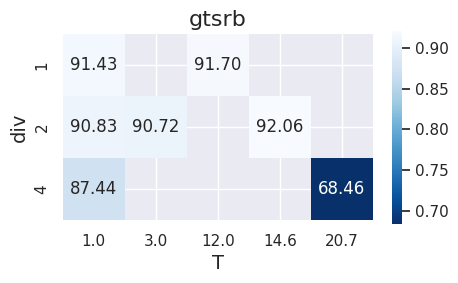

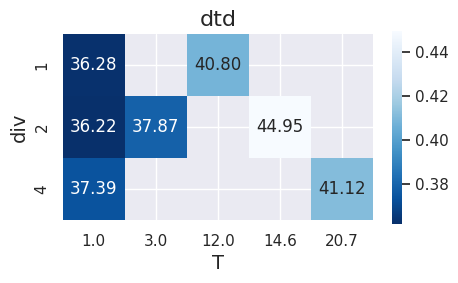

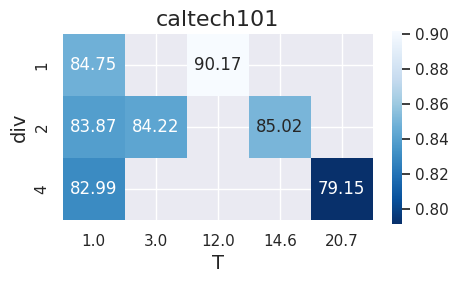

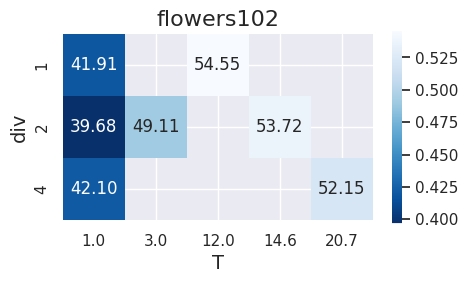

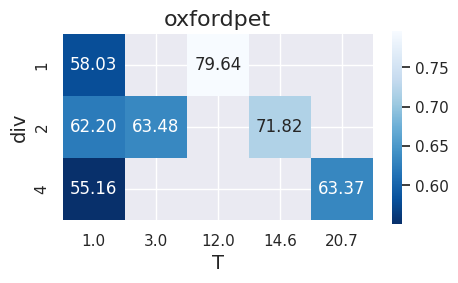

In [160]:
df = df_base

df = df.filter(pl.col("Name") != "resnet50_12.0_4_12")

datasets = df["dataname"].unique()


for dataset in datasets:
    df_ds = df.filter(pl.col("dataname") == dataset)
    df_piv = df_ds.pivot(values="test_acc", index="div", columns="T").reverse()
    
    # new_columns = pl.Series([df_piv.columns[0]]).extend(pl.Series(df_piv.columns[1:]).reverse()).to_list()
    # df_piv = df_piv.select(new_columns)
    df_piv_ind = df_piv[df_piv.columns[0]]
    df_piv_val = df_piv.select([str(num) for num in sorted(df_piv.columns[1:], key=float)])

    fig, ax = plt.subplots(figsize=(len(df_piv.columns)/1.2, len(df_piv)/1.2))
    ax = sns.heatmap(df_piv_val, annot=df_piv_val*100, cbar=True, square=True, cmap="Blues_r", xticklabels=pl.Series(df_piv_val.columns).str.head(4), yticklabels=df_piv_ind, fmt=".2f")
    ax.set_title(dataset, fontsize=16)
    ax.set_xlabel("T", fontsize=14)
    ax.set_ylabel(df_piv_ind.name, fontsize=14, rotation=90)
    plt.show()
